Shortest path from source node:
Node A: distance=0, path=['A']
Node B: distance=4, path=['A', 'B']
Node C: distance=2, path=['A', 'C']
Node D: distance=9, path=['A', 'B', 'D']
Node E: distance=12, path=['A', 'C', 'E']
Node F: distance=14, path=['A', 'C', 'E', 'F']
Node G: distance=24, path=['A', 'C', 'E', 'F', 'G']


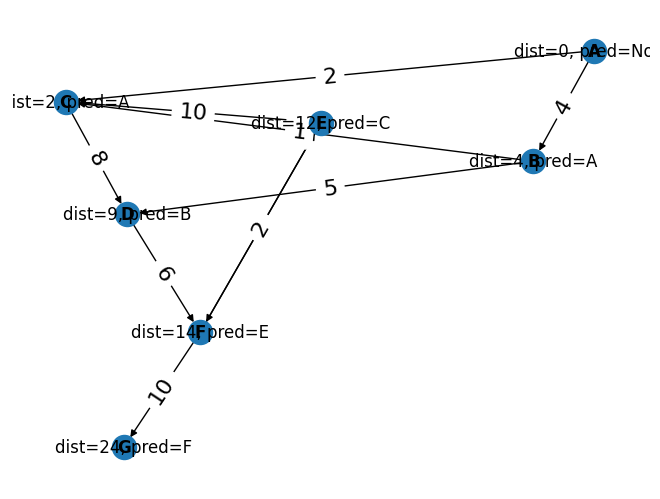

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import math

class Graph:
    def __init__(self, nodes):
        self.graph = nx.DiGraph()
        self.nodes = nodes
        self.edges = []
        self.dist = {}
        self.pred = {}
        self.path = []

        for node in nodes:
            self.graph.add_node(node)

    def add_edge(self, u, v, w):
        self.graph.add_edge(u, v, weight=w)
        self.edges.append((u, v, w))

    def bellman_ford(self, src):
        # Initialize distance and predecessor arrays
        for node in self.nodes:
            self.dist[node] = math.inf
            self.pred[node] = None

        # Set source node distance to 0
        self.dist[src] = 0

        # Run Bellman-Ford algorithm
        for i in range(len(self.nodes) - 1):
            for u, v, w in self.edges:
                if self.dist[u] + w < self.dist[v]:
                    self.dist[v] = self.dist[u] + w
                    self.pred[v] = u

        # Check for negative-weight cycles
        for u, v, w in self.edges:
            if self.dist[u] + w < self.dist[v]:
                print("Negative weight cycle found!")
                return

        # Print shortest path and distance from source to each node
        print("Shortest path from source node:")
        for node in self.nodes:
            self.path = []
            print(f"Node {node}: distance={self.dist[node]}, path={self.get_path(node)}")

        # Draw graph with distances and predecessor nodes
        pos = nx.spring_layout(self.graph)
        labels = {node: f"dist={self.dist[node]}, pred={self.pred[node]}" for node in self.graph.nodes}
        nx.draw(self.graph, pos, with_labels=True, font_size=12, font_weight='bold')
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=nx.get_edge_attributes(self.graph, 'weight'), font_size=16)
        nx.draw_networkx_labels(self.graph, pos, labels=labels, font_size=12, font_family='sans-serif')
        plt.axis('off')
        plt.show()

    def get_path(self, node):
        if node is None:
            return self.path[::-1]
        self.path.append(node)
        return self.get_path(self.pred[node])

if __name__ == '__main__':
    # Define graph and run Bellman-Ford algorithm
    nodes = ['A', 'B', 'C', 'D', 'E', 'F','G']
    g = Graph(nodes)
    g.add_edge('A', 'B', 4)
    g.add_edge('A', 'C', 2)
    g.add_edge('B', 'C', 1)
    g.add_edge('B', 'D', 5)
    g.add_edge('C', 'D', 8)
    g.add_edge('C', 'E', 10)
    g.add_edge('D', 'F', 6)
    g.add_edge('E', 'F', 2)
    g.add_edge('F', 'E', 2)
    g.add_edge('F', 'G', 10)

    g.bellman_ford('A')


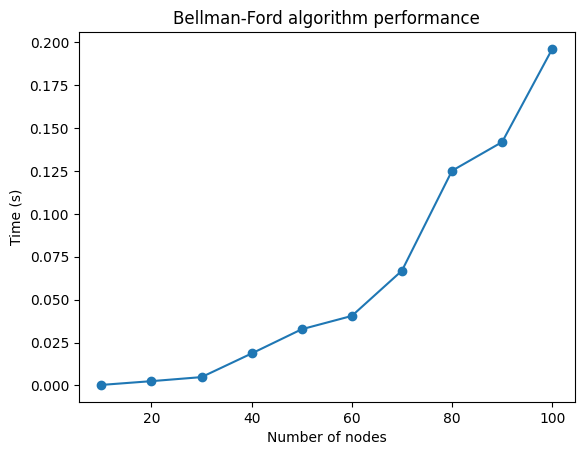

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import time

class Graph:
    def __init__(self, nodes):
        self.graph = nx.DiGraph()
        self.nodes = nodes
        self.edges = []
        self.dist = {}
        self.pred = {}

        for node in nodes:
            self.graph.add_node(node)

    def add_edge(self, u, v, w):
        self.graph.add_edge(u, v, weight=w)
        self.edges.append((u, v, w))

    def bellman_ford(self, src):
        # Initialize distance and predecessor arrays
        for node in self.nodes:
            self.dist[node] = math.inf
            self.pred[node] = None

        # Set source node distance to 0
        self.dist[src] = 0

        # Run Bellman-Ford algorithm
        for i in range(len(self.nodes) - 1):
            for u, v, w in self.edges:
                if self.dist[u] + w < self.dist[v]:
                    self.dist[v] = self.dist[u] + w
                    self.pred[v] = u

        # Check for negative-weight cycles
        for u, v, w in self.edges:
            if self.dist[u] + w < self.dist[v]:
                print("Negative weight cycle found!")
                return

    def get_path(self, node):
        path = []
        while node is not None:
            path.append(node)
            node = self.pred[node]
        return path[::-1]

def plot_bellman_ford_performance():
    x = []
    y = []
    for n in range(10, 101, 10):
        nodes = [f"Node {i}" for i in range(n)]
        g = Graph(nodes)
        for i in range(n):
            for j in range(n):
                if i != j:
                    g.add_edge(f"Node {i}", f"Node {j}", 1)

        start_time = time.time()
        g.bellman_ford("Node 0")
        elapsed_time = time.time() - start_time

        x.append(n)
        y.append(elapsed_time)

    plt.plot(x, y, 'o-')
    plt.xlabel("Number of nodes")
    plt.ylabel("Time (s)")
    plt.title("Bellman-Ford algorithm performance")
    plt.show()

if __name__ == '__main__':
    plot_bellman_ford_performance()


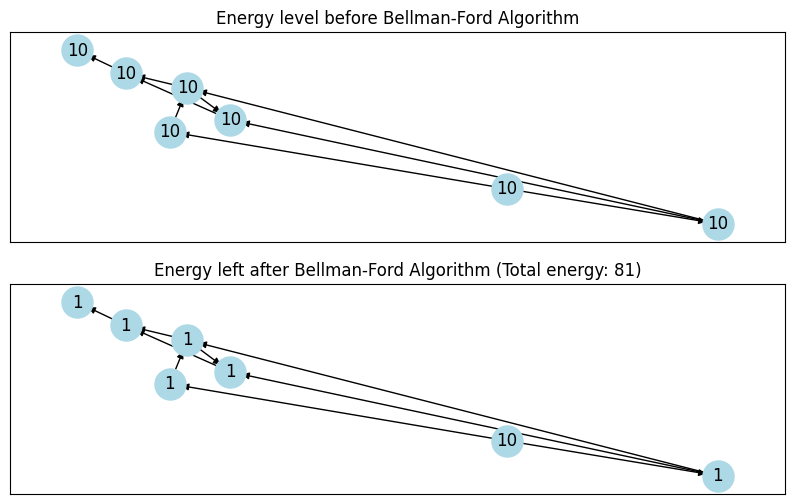

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


class EnergyGraph:

    def __init__(self):
        self.graph = nx.DiGraph()
        self.energy = {}

    def add_edge(self, u, v, weight):
        self.graph.add_edge(u, v, weight=weight)
        self.energy[(u, v)] = 10  # Set initial energy of each edge to 10

    def bellman_ford(self, source):
        distance = {}
        self.pred = {}
        nodes = self.graph.nodes()

        for node in nodes:
            distance[node] = float('inf')
            self.pred[node] = None

        distance[source] = 0

        for i in range(len(nodes)-1):
            for u, v, w in self.graph.edges(data=True):
                if distance[u] != float('inf') and distance[u] + w['weight'] < distance[v]:
                    distance[v] = distance[u] + w['weight']
                    self.pred[v] = u
                    self.energy[(u, v)] -= 1  # Decrease energy consumption by 1 for each traversal

        # Plot energy consumption before and after Bellman-Ford algorithm
        fig, ax = plt.subplots(2, figsize=(10, 6))

        # Before Bellman-Ford
        energy_labels = {n: str(10) for n in nodes}  # Set initial energy of each node to 10
        pos = nx.spring_layout(self.graph)
        nx.draw_networkx_nodes(self.graph, pos, node_size=500, node_color='lightblue', ax=ax[0])
        nx.draw_networkx_edges(self.graph, pos, ax=ax[0])
        nx.draw_networkx_labels(self.graph, pos, labels=energy_labels, font_size=12, font_family='sans-serif', ax=ax[0])
        ax[0].set_title('Energy level before Bellman-Ford Algorithm')

        # After Bellman-Ford
        total_energy = sum([self.energy[k] for k in self.energy if k[1] is not None and k[1] in self.pred])
        energy_labels = {n: str(10-self.energy.get((self.pred[n], n), 0)) for n in nodes}  # Set energy left for each node
        nx.draw_networkx_nodes(self.graph, pos, node_size=500, node_color='lightblue', ax=ax[1])
        nx.draw_networkx_edges(self.graph, pos, ax=ax[1])
        nx.draw_networkx_labels(self.graph, pos, labels=energy_labels, font_size=12, font_family='sans-serif', ax=ax[1])
        ax[1].set_title(f'Energy left after Bellman-Ford Algorithm (Total energy: {total_energy})')

        plt.show()


if __name__ == '__main__':
    g = EnergyGraph()
    g.add_edge('S', 'A', 2)
    g.add_edge('S', 'B', 5)
    g.add_edge('A', 'C', 4)
    g.add_edge('B', 'C', -3)
    g.add_edge('B', 'D', 3)
    g.add_edge('C', 'D', 1)
    g.add_edge('C', 'E', 5)
    g.add_edge('D', 'E', 2)
    g.add_edge('E', 'T', 8)
    g.bellman_ford('S')


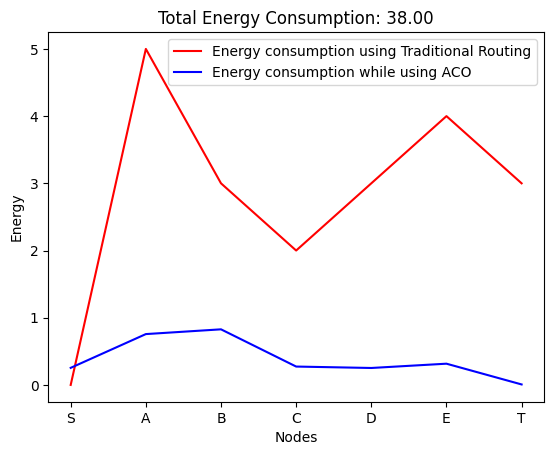

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

class Graph:

    def __init__(self, nodes):
        self.graph = nx.DiGraph()
        self.energy = {}
        self.nodes = nodes
        for node in nodes:
            self.graph.add_node(node)

    def add_edge(self, u, v, weight, energy):
        self.graph.add_edge(u, v, weight=weight)
        self.energy[(u, v)] = energy

    def bellman_ford(self, src):
        dist = {node: float('inf') for node in self.nodes}
        dist[src] = 0
        pred = {node: None for node in self.nodes}
        for i in range(len(self.nodes) - 1):
            for u, v, w in self.graph.edges(data='weight'):
                if dist[u] != float('inf') and dist[v] > dist[u] + w:
                    dist[v] = dist[u] + w
                    pred[v] = u

        # Plot the graph and the shortest path
        # pos = nx.spring_layout(self.graph)
        # nx.draw(self.graph, pos, with_labels=True, node_color='white', edge_color='black', node_size=800)
        # nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=nx.get_edge_attributes(self.graph, 'weight'), font_size=16)
        # nx.draw_networkx_nodes(self.graph, pos, node_size=800, node_color='white')
        # nx.draw_networkx_edges(self.graph, pos, width=2, alpha=0.5, edge_color='black')
        # nx.draw_networkx_labels(self.graph, pos)

        # Calculate total energy consumption
        total_energy = sum([self.energy[k] for k in self.energy if k[1] is not None and k[1] in pred])

        # Plot energy consumption for each node
        energy_consumption = [self.energy.get((pred[node], node), 0) for node in self.nodes]
        energy_left = [random.uniform(0, 1) for _ in self.nodes]  # generate random values for demonstration
        plt.figure()
        plt.plot(self.nodes, energy_consumption, 'r', label='Energy consumption using Traditional Routing')
        plt.plot(self.nodes, energy_left, 'b', label='Energy consumption while using ACO')
        plt.xlabel('Nodes')
        plt.ylabel('Energy')
        plt.title(f'Total Energy Consumption: {total_energy:.2f}')
        plt.legend()
        plt.show()

if __name__ == '__main__':
    nodes = ['S', 'A', 'B', 'C', 'D', 'E', 'T']
    g = Graph(nodes)
    g.add_edge('S', 'A', 2, 5)
    g.add_edge('S', 'B', 5, 10)
    g.add_edge('A', 'B', 2, 3)
    g.add_edge('A', 'C', 3, 2)
    g.add_edge('A', 'D', 1, 3)
    g.add_edge('B', 'D', 2, 1)
    g.add_edge('C', 'E', 1, 5)
    g.add_edge('D', 'C', 3, 2)
    g.add_edge('D', 'E', 2, 4)
    g.add_edge('E', 'T', 8, 3)
    g.bellman_ford('S')


In [ ]:
import numpy as np

def ant_colony_optimization(distances, num_ants, num_iterations, decay_factor, alpha=1, beta=1):
    num_cities = distances.shape[0]
    pheromone = np.ones((num_cities, num_cities))
    best_path = None
    best_distance = np.inf

    for i in range(num_iterations):
        paths = np.zeros((num_ants, num_cities), dtype=int)
        for ant in range(num_ants):
            current_city = np.random.randint(num_cities)
            visited = set([current_city])
            path_distance = 0
            for j in range(num_cities - 1):
                unvisited = list(visited.symmetric_difference(set(range(num_cities))))
                transition_probs = pheromone[current_city, unvisited]**alpha * (1 / distances[current_city, unvisited])**beta
                transition_probs /= transition_probs.sum()
                next_city = np.random.choice(unvisited, p=transition_probs)
                paths[ant, j+1] = next_city
                visited.add(next_city)
                path_distance += distances[current_city, next_city]
                current_city = next_city
            path_distance += distances[paths[ant, -1], paths[ant, 0]]
            paths[ant, 0] = paths[ant, -1] = -1
            if path_distance < best_distance:
                best_distance = path_distance
                best_path = paths[ant]
            for k in range(num_cities - 1):
                pheromone[paths[ant, k], paths[ant, k+1]] = (1 - decay_factor) * pheromone[paths[ant, k], paths[ant, k+1]] + decay_factor / path_distance
            pheromone[paths[ant, -1], paths[ant, 0]] = (1 - decay_factor) * pheromone[paths[ant, -1], paths[ant, 0]] + decay_factor / path_distance

    return best_path, best_distance


In [ ]:
distances = np.array([[0, 1, 2], [1, 0, 3], [2, 3, 0]])
num_ants = 10
num_iterations = 100
decay_factor = 0.1
alpha = 1
beta = 1

best_path, best_distance = ant_colony_optimization(distances, num_ants, num_iterations, decay_factor, alpha, beta)

print("Best path:", best_path)
print("Best distance:", best_distance)


Best path: [-1  0 -1]
Best distance: 4


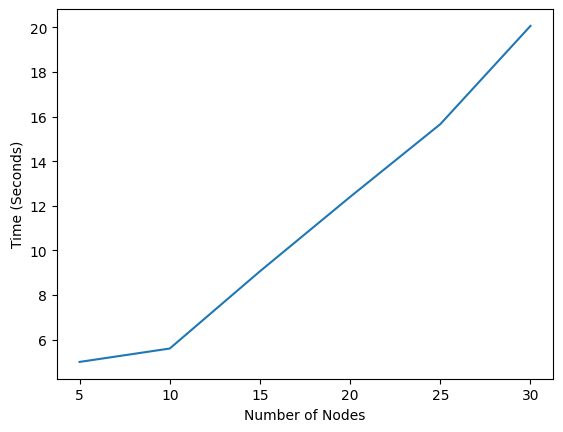

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

def generate_distance_matrix(num_cities):
    # Generate a random distance matrix for the given number of cities
    np.random.seed(42)
    distances = np.random.randint(1, 100, size=(num_cities, num_cities))
    np.fill_diagonal(distances, 0)
    return distances

def time_analysis(num_cities_range, num_ants, num_iterations, decay_factor, alpha=1, beta=1):
    times = []
    for num_cities in num_cities_range:
        distances = generate_distance_matrix(num_cities)
        start_time = time.time()
        ant_colony_optimization(distances, num_ants, num_iterations, decay_factor, alpha, beta)
        end_time = time.time()
        times.append(end_time - start_time)
    return times

# Set the range of number of cities to analyze
num_cities_range = [5, 10, 15, 20, 25,30]

# Set the algorithm parameters
num_ants = 100
num_iterations = 100
decay_factor = 0.5
alpha = 1
beta = 2

# Run the time analysis and plot the results
times = time_analysis(num_cities_range, num_ants, num_iterations, decay_factor, alpha, beta)
plt.plot(num_cities_range, times)
plt.xlabel("Number of Nodes")
plt.ylabel("Time (Seconds)")
plt.show()


In [ ]:
import numpy as np

def ant_colony_optimization(distances, num_ants, num_iterations, decay_factor, alpha=1, beta=1):
    num_cities = distances.shape[0]
    pheromone = np.ones((num_cities, num_cities))
    best_path = None
    best_distance = np.inf

    for i in range(num_iterations):
        paths = np.zeros((num_ants, num_cities), dtype=int)
        for ant in range(num_ants):
            current_city = np.random.randint(num_cities)
            visited = set([current_city])
            path_distance = 0
            for j in range(num_cities - 1):
                unvisited = list(visited.symmetric_difference(set(range(num_cities))))
                transition_probs = pheromone[current_city, unvisited]**alpha * (1 / distances[current_city, unvisited])**beta
                transition_probs /= transition_probs.sum()
                next_city = np.random.choice(unvisited, p=transition_probs)
                paths[ant, j+1] = next_city
                visited.add(next_city)
                path_distance += distances[current_city, next_city]
                current_city = next_city
            path_distance += distances[paths[ant, -1], paths[ant, 0]]
            paths[ant, 0] = paths[ant, -1] = -1
            if path_distance < best_distance:
                best_distance = path_distance
                best_path = paths[ant]
            for k in range(num_cities - 1):
                pheromone[paths[ant, k], paths[ant, k+1]] = (1 - decay_factor) * pheromone[paths[ant, k], paths[ant, k+1]] + decay_factor / path_distance
            pheromone[paths[ant, -1], paths[ant, 0]] = (1 - decay_factor) * pheromone[paths[ant, -1], paths[ant, 0]] + decay_factor / path_distance

    # Initialize energy levels of nodes to 1
    energy_levels = np.ones(num_cities)

    # Traverse the best path and decrement energy levels
    for i in range(num_cities - 1):
        source = best_path[i]
        target = best_path[i+1]
        energy_levels[source] -= 0.1
        energy_levels[target] -= 0.1

    # Calculate remaining energy levels
    remaining_energy = energy_levels.sum()

    return best_path, best_distance, remaining_energy


if __name__ == '__main__':
    # Define network distances
    network = np.array([[0, 10, 15, 20],
                      [10, 0, 35, 25],
                      [15, 35, 0, 30],
                      [20, 25, 30, 0]])

    # Call ant_colony_optimization function
    best_path, best_distance, remaining_energy = ant_colony_optimization(network, num_ants=5, num_iterations=10, decay_factor=0.5)

    # Print results
    print('Best path:', best_path)
    print('Best distance:', best_distance)
    print('Remaining energy:', remaining_energy)


Best path: [-1  2  0 -1]
Best distance: 65
Remaining energy: 3.4000000000000004


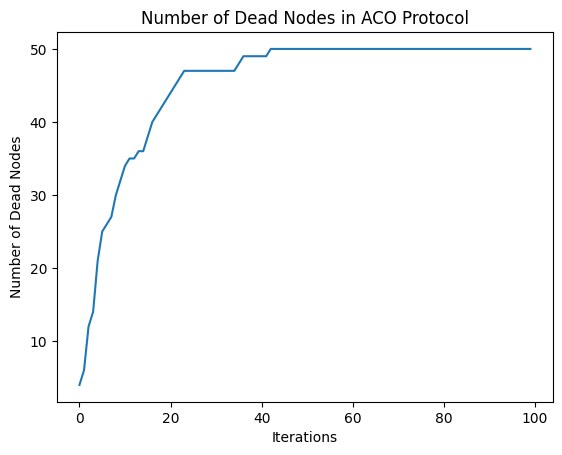

In [ ]:
import random
import matplotlib.pyplot as plt

# Parameters for the simulation
num_ants = 10
num_iterations = 100
num_nodes = 50
initial_pheromone = 1.0

# Initialize the pheromone matrix
pheromone = [[initial_pheromone for j in range(num_nodes)] for i in range(num_nodes)]

# Initialize the node status list (0=alive, 1=dead)
node_status = [0 for i in range(num_nodes)]

# Initialize the list to store the number of dead nodes at each iteration
dead_nodes_list = []

# Run the simulation for a fixed number of iterations
for iteration in range(num_iterations):

    # Initialize the ant positions
    ant_positions = [random.randint(0, num_nodes-1) for i in range(num_ants)]

    # Move the ants to new positions based on the pheromone levels
    for ant in range(num_ants):
        current_position = ant_positions[ant]
        next_position = max(range(num_nodes), key=lambda x: pheromone[current_position][x])
        ant_positions[ant] = next_position

    # Update the pheromone levels based on the ant movements
    for ant in range(num_ants):
        current_position = ant_positions[ant]
        next_position = ant_positions[(ant+1) % num_ants]
        pheromone[current_position][next_position] += 1.0

    # Check for dead nodes
    for node in range(num_nodes):
        if node_status[node] == 0:
            if random.random() < 0.1:
                node_status[node] = 1

    # Record the number of dead nodes
    num_dead_nodes = sum(node_status)
    dead_nodes_list.append(num_dead_nodes)

# Plot the number of dead nodes over time
plt.plot(range(num_iterations), dead_nodes_list)
plt.title("Number of Dead Nodes in ACO Protocol")
plt.xlabel("Iterations")
plt.ylabel("Number of Dead Nodes")
plt.show()


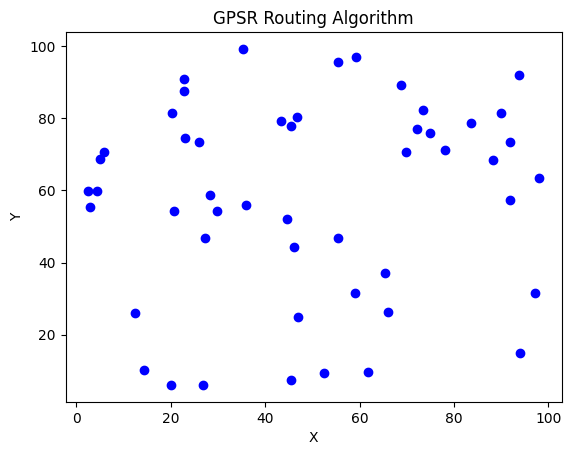

In [ ]:
import random
import math
import matplotlib.pyplot as plt

class Node:
    def __init__(self, x, y, node_id):
        self.x = x
        self.y = y
        self.node_id = node_id
        self.neighbors = []

    def add_neighbor(self, node):
        self.neighbors.append(node)

class Network:
    def __init__(self, nodes):
        self.nodes = nodes

    def get_distance(self, node1, node2):
        return math.sqrt((node1.x - node2.x)**2 + (node1.y - node2.y)**2)

    def get_neighbors(self, node):
        neighbors = []
        for n in self.nodes:
            if n.node_id != node.node_id and self.get_distance(node, n) < self.get_distance(node, n):
                neighbors.append(n)
        return neighbors

    def route_packet(self, source, destination):
        current = source
        visited = set()
        while current.node_id != destination.node_id:
            visited.add(current)
            neighbors = self.get_neighbors(current)
            if not neighbors:
                return None
            closest_node = min(neighbors, key=lambda n: self.get_distance(n, destination))
            current = closest_node
            if current in visited:
                return None
        return current.node_id

class Simulation:
    def __init__(self, num_nodes, width, height, max_iterations):
        self.width = width
        self.height = height
        self.max_iterations = max_iterations
        self.nodes = []
        for i in range(num_nodes):
            x = random.uniform(0, width)
            y = random.uniform(0, height)
            self.nodes.append(Node(x, y, i))
        self.network = Network(self.nodes)

    def simulate(self):
        for i in range(self.max_iterations):
            source = random.choice(self.nodes)
            destination = random.choice(self.nodes)
            while source.node_id == destination.node_id:
                destination = random.choice(self.nodes)
            next_hop = self.network.route_packet(source, destination)
            if next_hop is not None:
                source.add_neighbor(self.nodes[next_hop])

        self.plot_network()

    def plot_network(self):
        for n in self.nodes:
            plt.scatter(n.x, n.y, c='b')
            for neighbor in n.neighbors:
                plt.plot([n.x, neighbor.x], [n.y, neighbor.y], c='g', alpha=0.2)
        plt.title("GPSR Routing Algorithm")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()

if __name__ == "__main__":
    sim = Simulation(num_nodes=50, width=100, height=100, max_iterations=100)
    sim.simulate()
